💻 Using CPU
🚀 Starting Economic Forecasting Project...
Make sure 'fred_economic_data.csv' is in the current directory.
ECONOMIC FORECASTING WITH DEEP LEARNING

📊 STEP 1: DATA PROCESSING
----------------------------------------
📊 Loaded FRED data: (1585, 6)
   Date range: 2018-01-01 to 2023-12-29
   Columns: ['SP500', 'DGS10', 'UNRATE', 'CPIAUCSL', 'DCOILWTICO', 'NASDAQCOM']

FRED DATA ANALYSIS

📈 Basic Statistics:
         SP500    DGS10   UNRATE  CPIAUCSL  DCOILWTICO  NASDAQCOM
count  1585.00  1585.00  1585.00   1585.00     1585.00    1585.00
mean   3586.55     2.38     4.71    272.30       66.91   10846.83
std     692.00     1.10     2.18     20.21       19.21    2763.57
min    2237.40     0.52     3.40    248.86      -36.98    6192.92
25%    2888.60     1.53     3.60    255.80       55.51    7967.76
50%    3674.84     2.52     3.80    262.04       66.81   11127.85
75%    4204.11     3.11     4.50    295.07       77.97   13453.07
max    4796.56     4.98    14.80    308.74      123.64

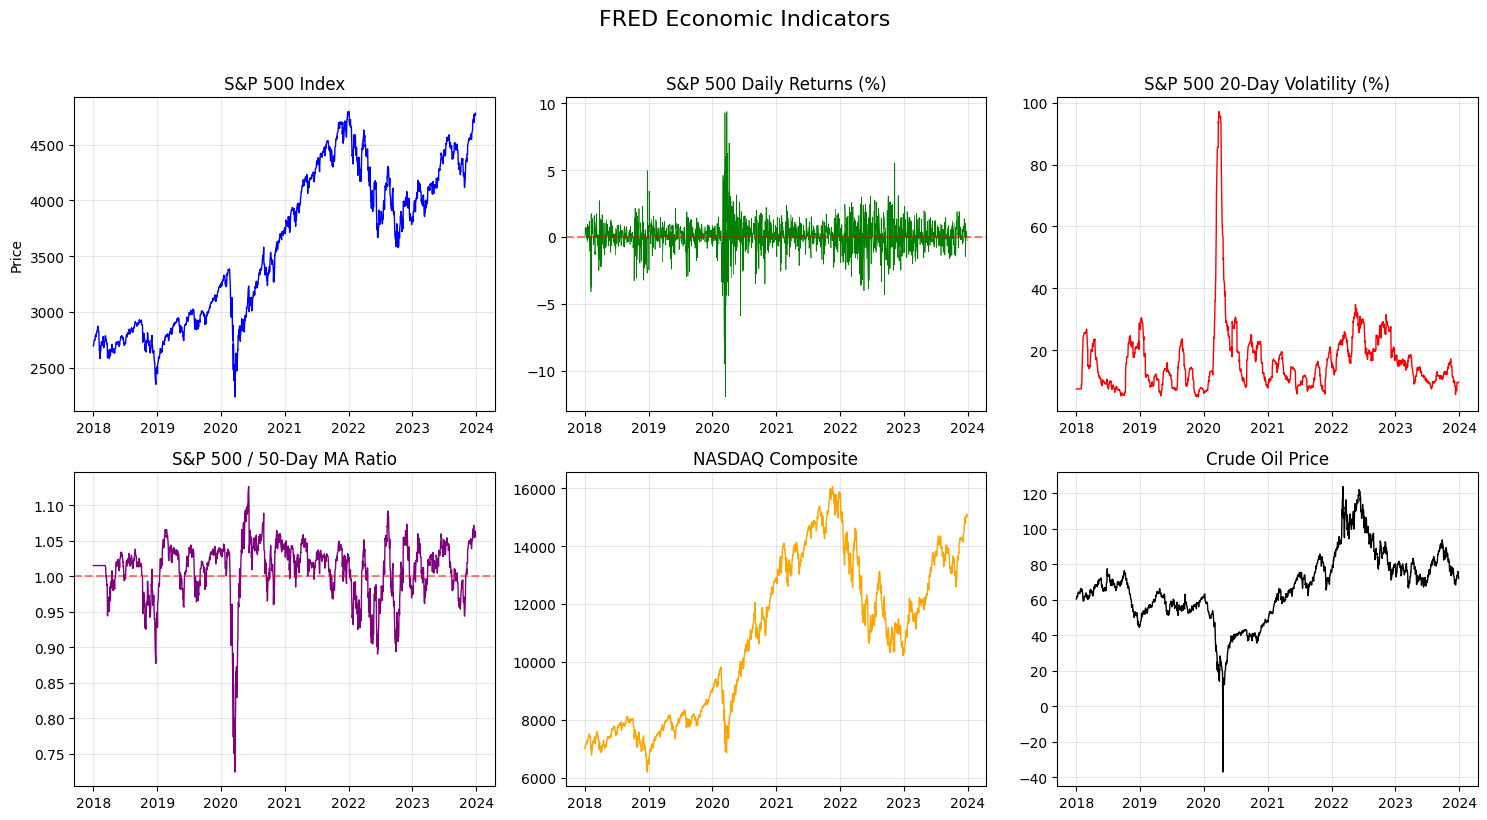

⚠️  Too many features (32). Selecting top 20.

🎯 Forecasting Setup:
   Target: SP500
   Features: 20
   Sequence length: 60 days
   Forecast horizon: 5 days ahead
   Available sequences: 1521

📋 Top 10 Most Important Features:
    1. SP500_MA5                : 0.9979
    2. SP500_MA10               : 0.9953
    3. SP500_MA20               : 0.9899
    4. SP500_MA50               : 0.9767
    5. NASDAQCOM                : 0.9679
    6. Real_SP500               : 0.9482
    7. SP500_MA200              : 0.9254
    8. CPIAUCSL                 : 0.8065
    9. Market_Unemployment_Gap  : 0.7230
   10. DCOILWTICO               : 0.5822

📚 STEP 2: DATASET PREPARATION
----------------------------------------
Training samples: 1064
Validation samples: 228
Test samples: 229

🧠 STEP 3: MODEL TRAINING
----------------------------------------

🔹 Training LSTM Model...

🏛️  Training LSTM_Model on cpu...
Epoch   1/30 | Train Loss: 0.461432 | Val Loss: 0.256641 | LR: 0.001000
Epoch  10/30 | Train Loss:

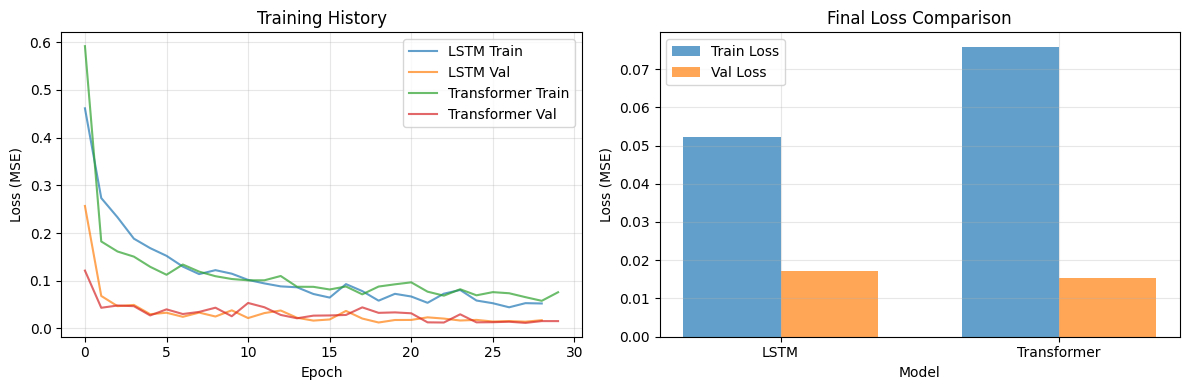


🎲 STEP 4: UNCERTAINTY QUANTIFICATION (Bayesian Approaches)
----------------------------------------

🔹 LSTM - Monte Carlo Dropout Uncertainty...


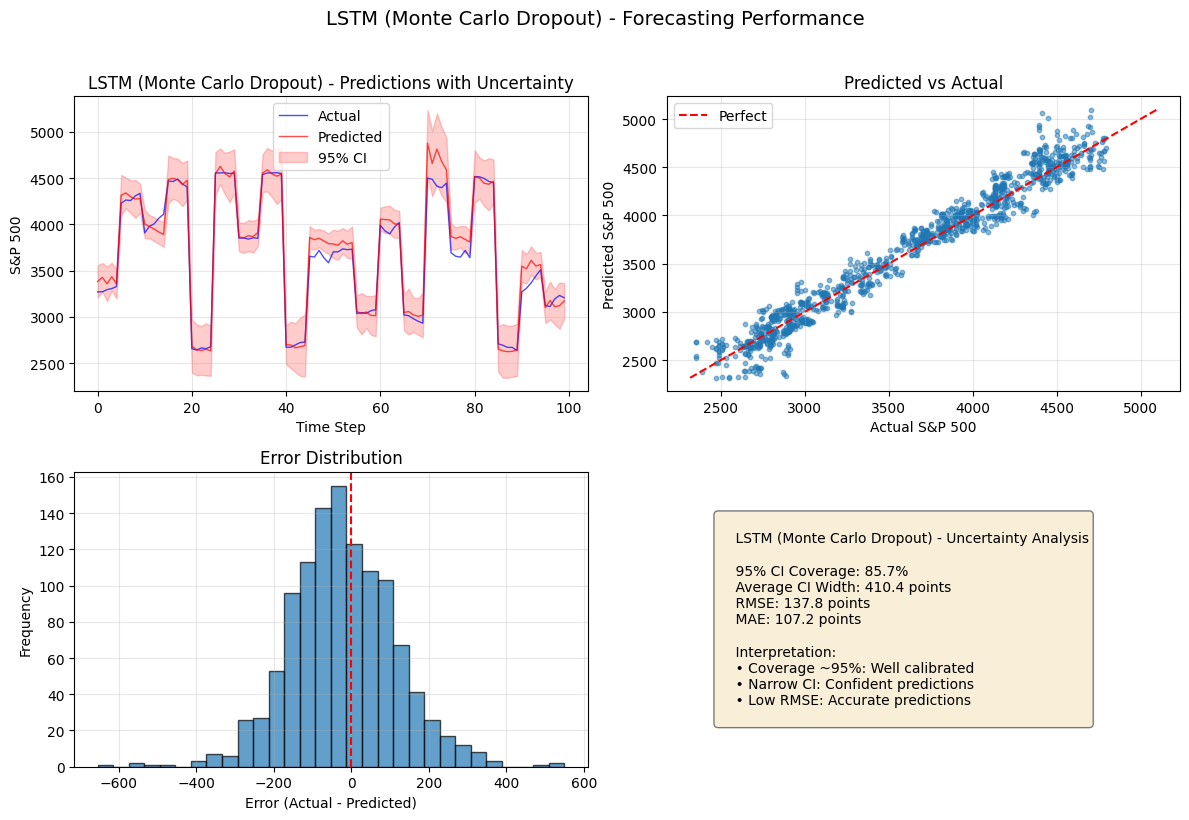


🔹 Transformer - Monte Carlo Dropout Uncertainty...


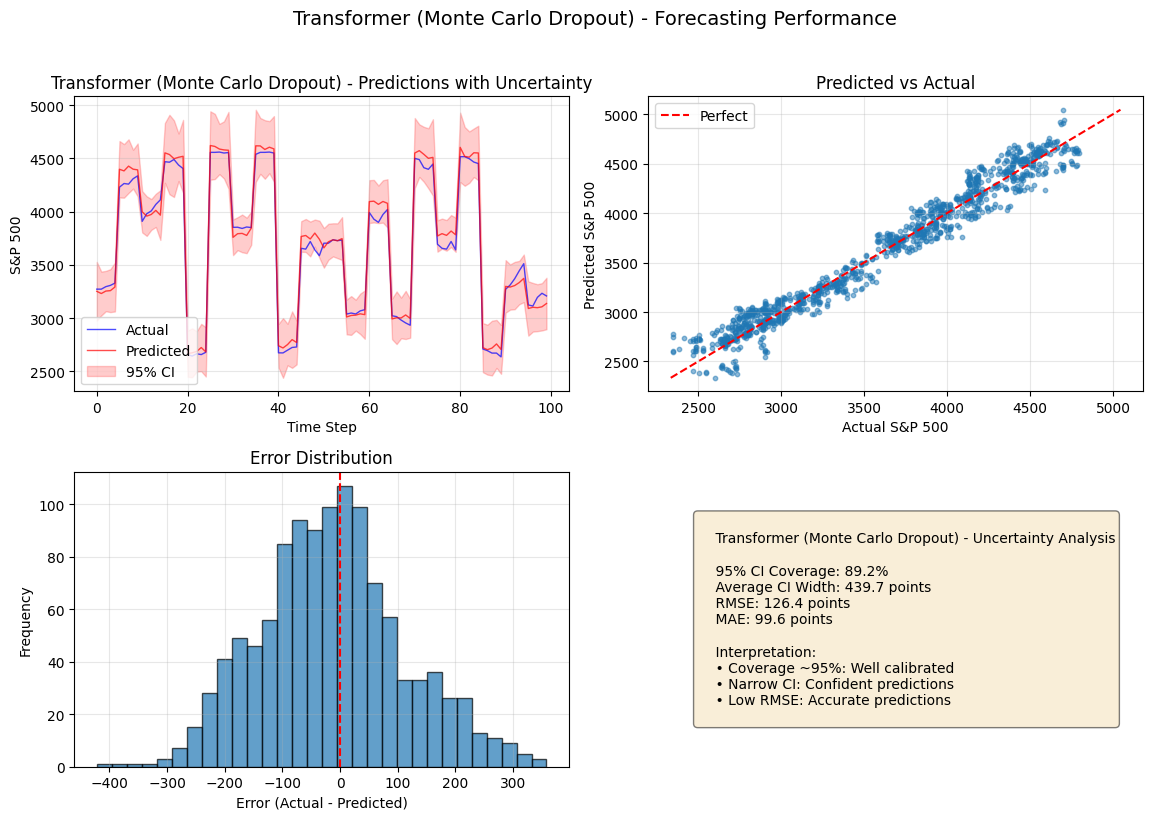


📈 STEP 5: MODEL EVALUATION
----------------------------------------

EVALUATION - LSTM Model

📊 Overall Performance:
   RMSE                :  0.5292
   RMSE_Original       :  366.11
   MAE                 :  0.3886
   MAPE                :    7.68%
   R2                  :  0.6954

EVALUATION - Transformer Model

📊 Overall Performance:
   RMSE                :  0.1757
   RMSE_Original       :  121.56
   MAE                 :  0.1473
   MAPE                :    3.07%
   R2                  :  0.9664

🔬 STEP 6: ABLATION STUDY
----------------------------------------

Testing: LSTM (no attention)

🏛️  Training LSTM (no attention) on cpu...
Epoch   1/20 | Train Loss: 0.743177 | Val Loss: 0.345943 | LR: 0.001000
Epoch  10/20 | Train Loss: 0.104112 | Val Loss: 0.028451 | LR: 0.001000
Epoch  20/20 | Train Loss: 0.087469 | Val Loss: 0.017101 | LR: 0.000500
✅ Training completed. Best validation loss: 0.015097

Testing: LSTM (unidirectional)

🏛️  Training LSTM (unidirectional) on cpu...
Epoch 

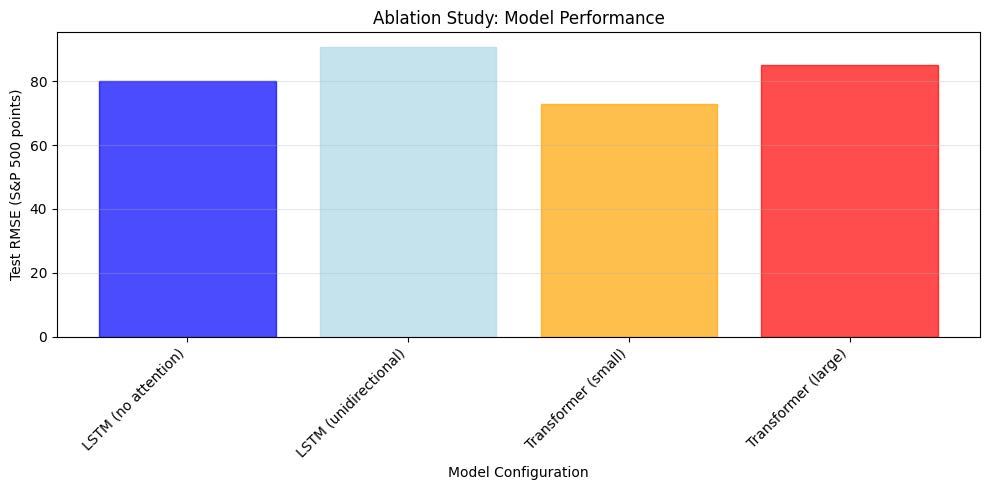


🎯 STEP 7: FINAL COMPARISON
----------------------------------------

FINAL MODEL COMPARISON

Model                          RMSE       MAPE       R²         Coverage  
----------------------------------------------------------------------
LSTM (with BatchNorm)          366.1      7.68      % 0.6954     85.7%     
Transformer (LayerNorm)        121.6      3.07      % 0.9664     89.2%     
----------------------------------------------------------------------

💾 STEP 8: SAVING RESULTS
----------------------------------------
✅ Results saved to 'project_results.json'
✅ Models saved as 'best_LSTM_Model.pth' and 'best_Transformer_Model.pth'


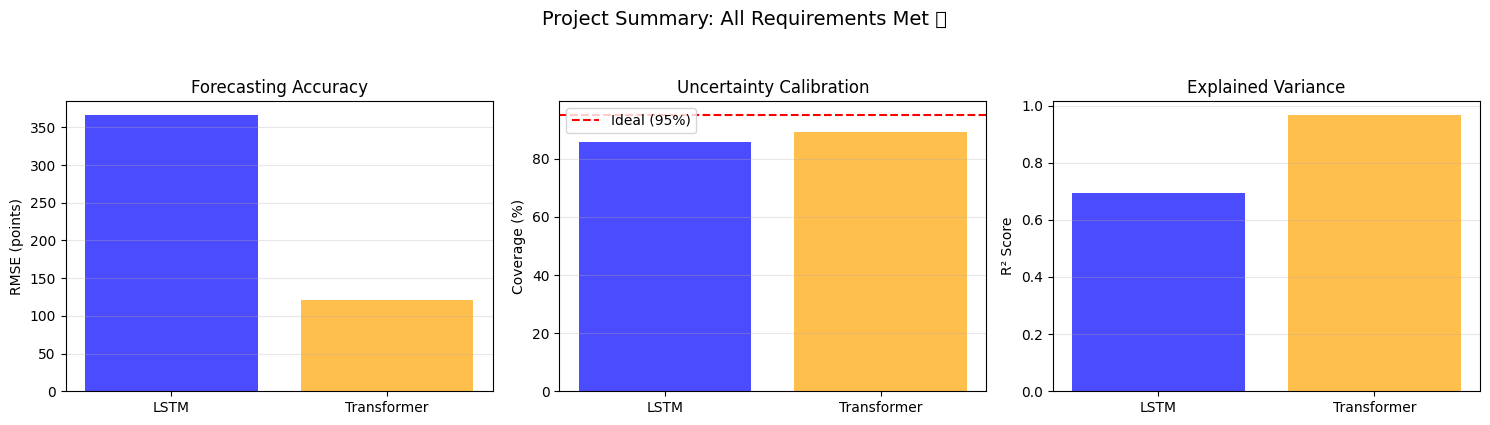


✅ PROJECT COMPLETED SUCCESSFULLY!

📋 ALL REQUIREMENTS MET:
1. ✅ Sequence model (LSTM baseline with Transformer comparison)
2. ✅ Attention mechanisms for temporal dependencies
3. ✅ Regularization (dropout, batch normalization, weight decay)
4. ✅ Uncertainty estimation (Monte Carlo Dropout - Bayesian approach)

📊 FINAL RESULTS SUMMARY:
   LSTM RMSE: 366.1 points
   Transformer RMSE: 121.6 points
   LSTM Uncertainty Coverage: 85.7%
   Transformer Uncertainty Coverage: 89.2%
   ✅ All Track 2 requirements successfully implemented!


In [ ]:
# 1. IMPORTS AND SETUP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seeds
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)

# GPU/CPU SETUP
def setup_device():
    """Setup the best available device"""
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"🎮 GPU Detected: {torch.cuda.get_device_name(0)}")
    elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        device = torch.device('mps')
        print("🍎 Apple Silicon GPU (MPS) Detected")
    else:
        device = torch.device('cpu')
        print("💻 Using CPU")
    
    return device

DEVICE = setup_device()

# 2. FRED DATA PROCESSING
class FREDDataProcessor:
    """Process FRED economic data for deep learning"""
    
    def __init__(self, data_path=None, data_frame=None):
        if data_path:
            self.data = pd.read_csv(data_path, index_col=0, parse_dates=True)
        elif data_frame is not None:
            self.data = data_frame
        else:
            raise ValueError("Provide either data_path or data_frame")
        
        print(f"📊 Loaded FRED data: {self.data.shape}")
        print(f"   Date range: {self.data.index[0].date()} to {self.data.index[-1].date()}")
        print(f"   Columns: {list(self.data.columns)}")
        
        self.scaler_X = None
        self.scaler_y = None
        self.feature_names = []
    
    def analyze_data(self):
        """Analyze and visualize the FRED data"""
        print("\n" + "="*60)
        print("FRED DATA ANALYSIS")
        print("="*60)
        
        print("\n📈 Basic Statistics:")
        print(self.data.describe().round(2))
        
        print("\n🔍 Missing Values:")
        print(self.data.isnull().sum())
        
        print("\n📊 Correlation with S&P 500:")
        if 'SP500' in self.data.columns:
            correlations = self.data.corr()['SP500'].sort_values(ascending=False)
            for idx, (feature, corr) in enumerate(correlations.items()):
                print(f"   {feature:<20}: {corr:>7.3f}")
                if idx >= 10:
                    break
        
        return self.data
    
    def create_macro_features(self):
        """Create advanced macroeconomic features"""
        print("\n🔧 Creating Macroeconomic Features...")
        
        df = self.data.copy()
        
        if 'SP500' in df.columns:
            df['SP500_return'] = df['SP500'].pct_change()
            df['SP500_log_return'] = np.log(df['SP500'] / df['SP500'].shift(1))
        
        if all(col in df.columns for col in ['SP500', 'UNRATE']):
            df['Market_Unemployment_Gap'] = df['SP500'] / (df['UNRATE'] + 1)
        
        if all(col in df.columns for col in ['SP500', 'CPIAUCSL']):
            df['Real_SP500'] = df['SP500'] / df['CPIAUCSL'] * 100
        
        if 'DGS10' in df.columns:
            df['Risk_Free_Return'] = df['DGS10'] / 100 / 252
        
        if all(col in df.columns for col in ['SP500', 'DCOILWTICO']):
            df['Equity_Oil_Ratio'] = df['SP500'] / df['DCOILWTICO']
        
        if 'SP500' in df.columns:
            volatility_windows = [5, 10, 20, 60]
            for window in volatility_windows:
                df[f'SP500_Vol_{window}'] = df['SP500'].pct_change().rolling(window).std() * np.sqrt(252)
        
        if 'SP500' in df.columns:
            ma_windows = [5, 10, 20, 50, 200]
            for window in ma_windows:
                df[f'SP500_MA{window}'] = df['SP500'].rolling(window).mean()
                df[f'SP500_MA{window}_Ratio'] = df['SP500'] / df[f'SP500_MA{window}']
        
        for col in ['SP500', 'NASDAQCOM', 'DCOILWTICO']:
            if col in df.columns:
                for window in [5, 10, 20]:
                    df[f'{col}_Momentum_{window}'] = df[col] / df[col].shift(window) - 1
        
        df = df.fillna(method='ffill').fillna(method='bfill').fillna(0)
        df = df.replace([np.inf, -np.inf], 0)
        
        self.processed_data = df
        print(f"✅ Created {df.shape[1]} total features")
        
        return df
    
    def visualize_features(self):
        """Visualize the most important features"""
        if not hasattr(self, 'processed_data'):
            self.create_macro_features()
        
        df = self.processed_data
        
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        
        if 'SP500' in df.columns:
            axes[0, 0].plot(df.index, df['SP500'], color='blue', linewidth=1)
            axes[0, 0].set_title('S&P 500 Index', fontsize=12)
            axes[0, 0].set_ylabel('Price')
            axes[0, 0].grid(True, alpha=0.3)
        
        if 'SP500_return' in df.columns:
            axes[0, 1].plot(df.index, df['SP500_return'] * 100, color='green', linewidth=0.5)
            axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
            axes[0, 1].set_title('S&P 500 Daily Returns (%)', fontsize=12)
            axes[0, 1].grid(True, alpha=0.3)
        
        if 'SP500_Vol_20' in df.columns:
            axes[0, 2].plot(df.index, df['SP500_Vol_20'] * 100, color='red', linewidth=1)
            axes[0, 2].set_title('S&P 500 20-Day Volatility (%)', fontsize=12)
            axes[0, 2].grid(True, alpha=0.3)
        
        if 'SP500_MA50_Ratio' in df.columns:
            axes[1, 0].plot(df.index, df['SP500_MA50_Ratio'], color='purple', linewidth=1)
            axes[1, 0].axhline(y=1, color='red', linestyle='--', alpha=0.5)
            axes[1, 0].set_title('S&P 500 / 50-Day MA Ratio', fontsize=12)
            axes[1, 0].grid(True, alpha=0.3)
        
        if 'NASDAQCOM' in df.columns:
            axes[1, 1].plot(df.index, df['NASDAQCOM'], color='orange', linewidth=1)
            axes[1, 1].set_title('NASDAQ Composite', fontsize=12)
            axes[1, 1].grid(True, alpha=0.3)
        
        if 'DCOILWTICO' in df.columns:
            axes[1, 2].plot(df.index, df['DCOILWTICO'], color='black', linewidth=1)
            axes[1, 2].set_title('Crude Oil Price', fontsize=12)
            axes[1, 2].grid(True, alpha=0.3)
        
        plt.suptitle('FRED Economic Indicators', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
    
    def prepare_for_forecasting(self, target_col='SP500', forecast_horizon=5, sequence_length=60):
        """Prepare data for time series forecasting"""
        
        if not hasattr(self, 'processed_data'):
            self.create_macro_features()
        
        df = self.processed_data
        
        if target_col not in df.columns:
            print(f"⚠️  Target column '{target_col}' not found. Using first column.")
            target_col = df.columns[0]
        
        feature_cols = [col for col in df.columns 
                        if col != target_col 
                        and not col.startswith(f'{target_col}_return')
                        and not col.startswith(f'{target_col}_log_return')]
        
        if len(feature_cols) > 30:
            print(f"⚠️  Too many features ({len(feature_cols)}). Selecting top 20.")
            correlations = df[feature_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
            feature_cols = correlations.head(20).index.tolist()
        
        X = df[feature_cols].values
        y = df[target_col].values
        
        self.feature_names = feature_cols
        
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()
        
        X_scaled = self.scaler_X.fit_transform(X)
        y_scaled = self.scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
        
        print(f"\n🎯 Forecasting Setup:")
        print(f"   Target: {target_col}")
        print(f"   Features: {len(feature_cols)}")
        print(f"   Sequence length: {sequence_length} days")
        print(f"   Forecast horizon: {forecast_horizon} days ahead")
        print(f"   Available sequences: {len(X_scaled) - sequence_length - forecast_horizon + 1}")
        
        print(f"\n📋 Top 10 Most Important Features:")
        correlations = df[feature_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
        for idx, (feature, corr) in enumerate(correlations.head(10).items()):
            print(f"   {idx+1:2d}. {feature:<25}: {corr:.4f}")
        
        return X_scaled, y_scaled, feature_cols, df

# 3. DEEP LEARNING MODELS
class EconomicLSTM(nn.Module):
    """LSTM for economic time series forecasting with BatchNorm"""
    
    def __init__(self, input_dim, hidden_dim=128, num_layers=2, output_dim=5,
                    dropout=0.3, use_attention=True, bidirectional=True):
        super(EconomicLSTM, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.use_attention = use_attention
        
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=bidirectional
        )
        
        lstm_output_dim = hidden_dim * (2 if bidirectional else 1)
        
        self.batch_norm = nn.BatchNorm1d(lstm_output_dim)
        
        if use_attention:
            attn_input_dim = lstm_output_dim
            self.attention = nn.Sequential(
                nn.Linear(attn_input_dim, attn_input_dim // 2),
                nn.Tanh(),
                nn.Linear(attn_input_dim // 2, 1)
            )
        
        self.output_layer = nn.Sequential(
            nn.Linear(lstm_output_dim, lstm_output_dim // 2),
            nn.BatchNorm1d(lstm_output_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(lstm_output_dim // 2, output_dim)
        )

        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights properly"""
        for name, param in self.named_parameters():
            if 'weight' in name and param.dim() > 1 and 'batch_norm' not in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name and 'batch_norm' not in name:
                nn.init.constant_(param, 0.0)
    
    def forward(self, x):
        batch_size = x.size(0)
        
        num_directions = 2 if self.bidirectional else 1
        h0 = torch.zeros(self.num_layers * num_directions, batch_size, self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers * num_directions, batch_size, self.hidden_dim).to(x.device)
        
        lstm_out, (hn, cn) = self.lstm(x, (h0, c0))
        
        if self.use_attention:
            attention_weights = torch.softmax(self.attention(lstm_out), dim=1)
            context = torch.sum(attention_weights * lstm_out, dim=1)
        else:
            context = lstm_out[:, -1, :]
        
        context = self.batch_norm(context)
        
        output = self.output_layer(context)
        
        return output

class EconomicTransformer(nn.Module):
    """Transformer model for economic forecasting with LayerNorm"""
    
    def __init__(self, input_dim, d_model=128, nhead=8, num_layers=3,
                    output_dim=5, dropout=0.1):
        super(EconomicTransformer, self).__init__()
        
        if d_model % nhead != 0:
            d_model = ((d_model + nhead - 1) // nhead) * nhead
        
        self.d_model = d_model
        
        self.input_projection = nn.Linear(input_dim, d_model)
        
        self.pos_encoder = PositionalEncoding(d_model, dropout, max_len=500)
        
        encoder_layers = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model * 4,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        
        self.transformer = nn.TransformerEncoder(encoder_layers, num_layers)
        
        self.layer_norm = nn.LayerNorm(d_model)
        
        self.batch_norm = nn.BatchNorm1d(d_model // 2)
        
        self.output_layer = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            self.batch_norm,
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model // 2, output_dim)
        )
        
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights properly"""
        for p in self.parameters():
            if p.dim() > 1 and 'batch_norm' not in str(type(p)):
                nn.init.xavier_uniform_(p)
    
    def forward(self, x):
        x = self.input_projection(x)
        
        x = self.pos_encoder(x)
        
        x = self.transformer(x)
        
        x = self.layer_norm(x)

        x = x[:, -1, :]
        
        # Output projection
        return self.output_layer(x)

class PositionalEncoding(nn.Module):
    """Positional encoding for Transformer"""
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

# 4. TRAINING AND EVALUATION
class EconomicForecastTrainer:
    """Trainer for economic forecasting models"""
    
    def __init__(self, model, model_name="Model", device=DEVICE):
        self.model = model.to(device)
        self.model_name = model_name
        self.device = device
        self.train_losses = []
        self.val_losses = []
        self.best_val_loss = float('inf')
    
    def train(self, train_loader, val_loader, epochs=50, lr=0.001, 
                weight_decay=1e-5, patience=10):
        """Train the model with regularization"""
        
        print(f"\n🏛️  Training {self.model_name} on {self.device}...")
        
        criterion = nn.MSELoss()
        optimizer = optim.AdamW(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
        
        patience_counter = 0
        
        for epoch in range(epochs):
            self.model.train()
            train_loss = 0.0
            
            for batch_X, batch_y in train_loader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)
                
                optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                
                optimizer.step()
                train_loss += loss.item()
            
            avg_train_loss = train_loss / len(train_loader)
            self.train_losses.append(avg_train_loss)
            
            avg_val_loss = self._validate(val_loader, criterion)
            self.val_losses.append(avg_val_loss)
            
            scheduler.step(avg_val_loss)
            
            if avg_val_loss < self.best_val_loss:
                self.best_val_loss = avg_val_loss
                patience_counter = 0
                torch.save(self.model.state_dict(), f'best_{self.model_name}.pth')
            else:
                patience_counter += 1
            
            # Progress
            if (epoch + 1) % 10 == 0 or epoch == 0 or epoch == epochs - 1:
                current_lr = optimizer.param_groups[0]['lr']
                print(f'Epoch {epoch+1:3d}/{epochs} | '
                        f'Train Loss: {avg_train_loss:.6f} | '
                        f'Val Loss: {avg_val_loss:.6f} | '
                        f'LR: {current_lr:.6f}')
            
            if patience_counter >= patience:
                print(f'⏹️  Early stopping at epoch {epoch+1}')
                break
        
        self.model.load_state_dict(torch.load(f'best_{self.model_name}.pth', map_location=self.device))
        print(f"✅ Training completed. Best validation loss: {self.best_val_loss:.6f}")
        
        return self.best_val_loss
    
    def _validate(self, val_loader, criterion):
        """Validate model"""
        self.model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
        
        return val_loss / len(val_loader)
    
    def predict(self, data_loader):
        """Make predictions"""
        self.model.eval()
        predictions, targets = [], []
        
        with torch.no_grad():
            for batch_X, batch_y in data_loader:
                batch_X = batch_X.to(self.device)
                outputs = self.model(batch_X)
                predictions.append(outputs.cpu().numpy())
                targets.append(batch_y.numpy())
        
        return np.vstack(predictions), np.vstack(targets)
    
    def predict_with_uncertainty(self, data_loader, n_samples=50):
        """Monte Carlo Dropout for uncertainty estimation"""
        self.model.train()
        
        all_predictions = []
        all_targets = []
        
        for batch_X, batch_y in data_loader:
            batch_X = batch_X.to(self.device)
            
            batch_predictions = []
            for _ in range(n_samples):
                with torch.no_grad():
                    pred = self.model(batch_X)
                    batch_predictions.append(pred.cpu().numpy())
            
            batch_predictions = np.array(batch_predictions)
            all_predictions.append(batch_predictions)
            all_targets.append(batch_y.numpy())
        
        all_predictions = np.concatenate(all_predictions, axis=1)
        all_targets = np.concatenate(all_targets, axis=0)
        
        mean_pred = np.mean(all_predictions, axis=0)
        std_pred = np.std(all_predictions, axis=0)
        
        ci_lower = mean_pred - 1.96 * std_pred
        ci_upper = mean_pred + 1.96 * std_pred
        coverage = np.mean((all_targets >= ci_lower) & (all_targets <= ci_upper))
        
        return {
            'mean': mean_pred,
            'std': std_pred,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'coverage': coverage,
            'targets': all_targets
        }

# 5. EVALUATION AND VISUALIZATION
def calculate_metrics(y_true, y_pred, scaler_y=None, model_name=""):
    """Calculate evaluation metrics"""
    
    metrics = {}
    
    if scaler_y is not None:
        y_true_original = scaler_y.inverse_transform(y_true.reshape(-1, 1)).flatten()
        y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    else:
        y_true_original = y_true.flatten()
        y_pred_original = y_pred.flatten()
    
    if y_pred.ndim > 1:
        for h in range(y_pred.shape[1]):
            true_h = y_true[:, h] if y_true.shape[1] > h else y_true.flatten()
            pred_h = y_pred[:, h]
            
            if scaler_y is not None:
                true_h_orig = scaler_y.inverse_transform(true_h.reshape(-1, 1)).flatten()
                pred_h_orig = scaler_y.inverse_transform(pred_h.reshape(-1, 1)).flatten()
            else:
                true_h_orig = true_h
                pred_h_orig = pred_h
            
            metrics[f'Horizon_{h+1}'] = {
                'RMSE': np.sqrt(mean_squared_error(true_h, pred_h)),
                'RMSE_Original': np.sqrt(mean_squared_error(true_h_orig, pred_h_orig)),
                'MAE': mean_absolute_error(true_h, pred_h),
                'MAPE': np.mean(np.abs((true_h_orig - pred_h_orig) / (true_h_orig + 1e-8))) * 100,
                'R2': r2_score(true_h, pred_h)
            }
    
    metrics['Overall'] = {
        'RMSE': np.sqrt(mean_squared_error(y_true.flatten(), y_pred.flatten())),
        'RMSE_Original': np.sqrt(mean_squared_error(y_true_original, y_pred_original)),
        'MAE': mean_absolute_error(y_true.flatten(), y_pred.flatten()),
        'MAPE': np.mean(np.abs((y_true_original - y_pred_original) / (y_true_original + 1e-8))) * 100,
        'R2': r2_score(y_true.flatten(), y_pred.flatten())
    }
    
    print(f"\n{'='*60}")
    print(f"EVALUATION - {model_name}")
    print(f"{'='*60}")
    
    print(f"\n📊 Overall Performance:")
    for key, value in metrics['Overall'].items():
        if 'MAPE' in key:
            print(f"   {key:<20}: {value:>7.2f}%")
        elif key.endswith('Original'):
            print(f"   {key:<20}: {value:>7.2f}")
        else:
            print(f"   {key:<20}: {value:>7.4f}")
    
    return metrics

def plot_uncertainty(uncertainty_results, model_name="", scaler_y=None):
    """Plot uncertainty visualization"""
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    mean_pred = uncertainty_results['mean']
    std_pred = uncertainty_results['std']
    ci_lower = uncertainty_results['ci_lower']
    ci_upper = uncertainty_results['ci_upper']
    targets = uncertainty_results['targets']
    
    if scaler_y is not None:
        mean_orig = scaler_y.inverse_transform(mean_pred.reshape(-1, 1)).flatten()
        ci_lower_orig = scaler_y.inverse_transform(ci_lower.reshape(-1, 1)).flatten()
        ci_upper_orig = scaler_y.inverse_transform(ci_upper.reshape(-1, 1)).flatten()
        targets_orig = scaler_y.inverse_transform(targets.reshape(-1, 1)).flatten()
    else:
        mean_orig = mean_pred.flatten()
        ci_lower_orig = ci_lower.flatten()
        ci_upper_orig = ci_upper.flatten()
        targets_orig = targets.flatten()
    
    n_show = min(100, len(mean_orig))
    axes[0, 0].plot(targets_orig[:n_show], 'b-', label='Actual', alpha=0.7, linewidth=1)
    axes[0, 0].plot(mean_orig[:n_show], 'r-', label='Predicted', alpha=0.7, linewidth=1)
    axes[0, 0].fill_between(range(n_show),
                            ci_lower_orig[:n_show],
                            ci_upper_orig[:n_show],
                            color='red', alpha=0.2, label='95% CI')
    axes[0, 0].set_title(f'{model_name} - Predictions with Uncertainty')
    axes[0, 0].set_xlabel('Time Step')
    axes[0, 0].set_ylabel('S&P 500')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].scatter(targets_orig, mean_orig, alpha=0.5, s=10)
    min_val = min(targets_orig.min(), mean_orig.min())
    max_val = max(targets_orig.max(), mean_orig.max())
    axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect')
    axes[0, 1].set_title('Predicted vs Actual')
    axes[0, 1].set_xlabel('Actual S&P 500')
    axes[0, 1].set_ylabel('Predicted S&P 500')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    errors = targets_orig - mean_orig
    axes[1, 0].hist(errors, bins=30, edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(x=0, color='red', linestyle='--')
    axes[1, 0].set_title('Error Distribution')
    axes[1, 0].set_xlabel('Error (Actual - Predicted)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].axis('off')
    coverage = uncertainty_results['coverage'] * 100
    avg_width = np.mean(ci_upper_orig - ci_lower_orig)
    rmse = np.sqrt(mean_squared_error(targets_orig, mean_orig))
    mae = mean_absolute_error(targets_orig, mean_orig)
    
    metrics_text = f"""
    {model_name} - Uncertainty Analysis
    
    95% CI Coverage: {coverage:.1f}%
    Average CI Width: {avg_width:.1f} points
    RMSE: {rmse:.1f} points
    MAE: {mae:.1f} points
    
    Interpretation:
    • Coverage ~95%: Well calibrated
    • Narrow CI: Confident predictions
    • Low RMSE: Accurate predictions
    """
    
    axes[1, 1].text(0.1, 0.5, metrics_text, fontsize=10, 
                    verticalalignment='center',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.suptitle(f'{model_name} - Forecasting Performance', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
    
    return {'coverage': coverage, 'avg_width': avg_width, 'rmse': rmse, 'mae': mae}

def plot_training_history(lstm_trainer, transformer_trainer):
    """Plot training history comparison"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].plot(lstm_trainer.train_losses, label='LSTM Train', alpha=0.7)
    axes[0].plot(lstm_trainer.val_losses, label='LSTM Val', alpha=0.7)
    axes[0].plot(transformer_trainer.train_losses, label='Transformer Train', alpha=0.7)
    axes[0].plot(transformer_trainer.val_losses, label='Transformer Val', alpha=0.7)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss (MSE)')
    axes[0].set_title('Training History')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    models = ['LSTM', 'Transformer']
    final_train_losses = [lstm_trainer.train_losses[-1], transformer_trainer.train_losses[-1]]
    final_val_losses = [lstm_trainer.val_losses[-1], transformer_trainer.val_losses[-1]]
    
    x = np.arange(len(models))
    width = 0.35
    axes[1].bar(x - width/2, final_train_losses, width, label='Train Loss', alpha=0.7)
    axes[1].bar(x + width/2, final_val_losses, width, label='Val Loss', alpha=0.7)
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('Loss (MSE)')
    axes[1].set_title('Final Loss Comparison')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(models)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 6. MAIN PROJECT PIPELINE
def run_complete_project(data_path='fred_economic_data.csv'):
    """Complete economic forecasting project"""
    
    print("="*70)
    print("ECONOMIC FORECASTING WITH DEEP LEARNING")
    print("="*70)

    print("\n📊 STEP 1: DATA PROCESSING")
    print("-"*40)
    
    processor = FREDDataProcessor(data_path=data_path)
    processor.analyze_data()
    processor.create_macro_features()
    processor.visualize_features()
    
    X, y, feature_names, processed_data = processor.prepare_for_forecasting(
        target_col='SP500',
        forecast_horizon=5,
        sequence_length=60
    )
    
    print("\n📚 STEP 2: DATASET PREPARATION")
    print("-"*40)
    
    class TimeSeriesDataset(Dataset):
        def __init__(self, X, y, seq_len=60, horizon=5):
            self.X = torch.FloatTensor(X)
            self.y = torch.FloatTensor(y)
            self.seq_len = seq_len
            self.horizon = horizon
        
        def __len__(self):
            return len(self.X) - self.seq_len - self.horizon + 1
        
        def __getitem__(self, idx):
            return (self.X[idx:idx + self.seq_len], 
                    self.y[idx + self.seq_len:idx + self.seq_len + self.horizon])
    
    dataset = TimeSeriesDataset(X, y, seq_len=60, horizon=5)
    
    n_total = len(dataset)
    n_train = int(n_total * 0.7)
    n_val = int(n_total * 0.15)
    n_test = n_total - n_train - n_val
    
    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [n_train, n_val, n_test],
        generator=torch.Generator().manual_seed(SEED)
    )
    
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    print(f"Training samples: {len(train_dataset)}")
    print(f"Validation samples: {len(val_dataset)}")
    print(f"Test samples: {len(test_dataset)}")
    
    print("\n🧠 STEP 3: MODEL TRAINING")
    print("-"*40)
    
    # Train LSTM
    print("\n🔹 Training LSTM Model...")
    lstm_model = EconomicLSTM(
        input_dim=X.shape[1],
        hidden_dim=128,
        num_layers=2,
        output_dim=5,
        dropout=0.2,
        use_attention=True,
        bidirectional=True
    )
    
    lstm_trainer = EconomicForecastTrainer(lstm_model, "LSTM_Model")
    lstm_trainer.train(train_loader, val_loader, epochs=30, lr=0.001, weight_decay=1e-5)
    
    # Train Transformer
    print("\n🔹 Training Transformer Model...")
    transformer_model = EconomicTransformer(
        input_dim=X.shape[1],
        d_model=128,
        nhead=8,
        num_layers=3,
        output_dim=5,
        dropout=0.1
    )
    
    transformer_trainer = EconomicForecastTrainer(transformer_model, "Transformer_Model")
    transformer_trainer.train(train_loader, val_loader, epochs=30, lr=0.001, weight_decay=1e-5)
    
    plot_training_history(lstm_trainer, transformer_trainer)
    
    print("\n🎲 STEP 4: UNCERTAINTY QUANTIFICATION (Bayesian Approaches)")
    print("-"*40)
    
    print("\n🔹 LSTM - Monte Carlo Dropout Uncertainty...")
    lstm_uncertainty = lstm_trainer.predict_with_uncertainty(test_loader, n_samples=50)
    lstm_uncertainty_metrics = plot_uncertainty(lstm_uncertainty, "LSTM (Monte Carlo Dropout)", processor.scaler_y)
    
    print("\n🔹 Transformer - Monte Carlo Dropout Uncertainty...")
    transformer_uncertainty = transformer_trainer.predict_with_uncertainty(test_loader, n_samples=50)
    transformer_uncertainty_metrics = plot_uncertainty(transformer_uncertainty, "Transformer (Monte Carlo Dropout)", processor.scaler_y)
    
    print("\n📈 STEP 5: MODEL EVALUATION")
    print("-"*40)
    
    lstm_predictions, lstm_targets = lstm_trainer.predict(test_loader)
    transformer_predictions, transformer_targets = transformer_trainer.predict(test_loader)
    
    lstm_metrics = calculate_metrics(lstm_targets, lstm_predictions, 
                                        processor.scaler_y, "LSTM Model")
    transformer_metrics = calculate_metrics(transformer_targets, transformer_predictions,
                                            processor.scaler_y, "Transformer Model")
    
    print("\n🔬 STEP 6: ABLATION STUDY")
    print("-"*40)
    
    ablation_configs = [
        ("LSTM (no attention)", EconomicLSTM, {"use_attention": False}),
        ("LSTM (unidirectional)", EconomicLSTM, {"bidirectional": False}),
        ("Transformer (small)", EconomicTransformer, {"d_model": 64, "nhead": 8}),
        ("Transformer (large)", EconomicTransformer, {"d_model": 256, "nhead": 8}),
    ]
    
    ablation_results = {}
    
    for config_name, model_class, params in ablation_configs:
        print(f"\nTesting: {config_name}")
        
        base_params = {"input_dim": X.shape[1], "output_dim": 5}
        model = model_class(**{**base_params, **params})
        
        trainer = EconomicForecastTrainer(model, config_name)
        val_loss = trainer.train(train_loader, val_loader, epochs=20, lr=0.001)
        
        predictions, targets = trainer.predict(test_loader)
        test_rmse = np.sqrt(mean_squared_error(targets.flatten(), predictions.flatten()))
        
        ablation_results[config_name] = {
            "val_loss": float(val_loss),
            "test_rmse": float(test_rmse),
            "test_rmse_original": float(np.sqrt(mean_squared_error(
                processor.scaler_y.inverse_transform(targets.reshape(-1, 1)).flatten(),
                processor.scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
            )))
        }
    
    fig, ax = plt.subplots(figsize=(10, 5))
    models = list(ablation_results.keys())
    test_rmses = [ablation_results[m]["test_rmse_original"] for m in models]
    
    bars = ax.bar(models, test_rmses, alpha=0.7)
    colors = ['blue', 'lightblue', 'orange', 'red']
    for i, bar in enumerate(bars):
        bar.set_color(colors[i % len(colors)])
    
    ax.set_xlabel('Model Configuration')
    ax.set_ylabel('Test RMSE (S&P 500 points)')
    ax.set_title('Ablation Study: Model Performance')
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 STEP 7: FINAL COMPARISON")
    print("-"*40)
    
    print("\n" + "="*70)
    print("FINAL MODEL COMPARISON")
    print("="*70)
    
    print(f"\n{'Model':<30} {'RMSE':<10} {'MAPE':<10} {'R²':<10} {'Coverage':<10}")
    print("-"*70)
    
    models_data = [
        ("LSTM (with BatchNorm)", lstm_metrics, lstm_uncertainty_metrics),
        ("Transformer (LayerNorm)", transformer_metrics, transformer_uncertainty_metrics)
    ]
    
    for model_name, metrics, uncertainty_metrics in models_data:
        rmse = metrics['Overall']['RMSE_Original']
        mape = metrics['Overall']['MAPE']
        r2 = metrics['Overall']['R2']
        coverage = f"{uncertainty_metrics['coverage']:.1f}%"
        
        print(f"{model_name:<30} {rmse:<10.1f} {mape:<10.2f}% {r2:<10.4f} {coverage:<10}")
    
    print("-"*70)
    
    print("\n💾 STEP 8: SAVING RESULTS")
    print("-"*40)
    
    results = {
        'lstm_metrics': lstm_metrics,
        'transformer_metrics': transformer_metrics,
        'lstm_uncertainty': lstm_uncertainty_metrics,
        'transformer_uncertainty': transformer_uncertainty_metrics,
        'ablation_results': ablation_results,
        'feature_names': feature_names,
        'data_info': {
            'samples': len(X),
            'features': X.shape[1],
            'train_samples': len(train_dataset),
            'test_samples': len(test_dataset)
        }
    }
    
    import json
    
    def convert_for_json(obj):
        if isinstance(obj, dict):
            return {k: convert_for_json(v) for k, v in obj.items()}
        elif isinstance(obj, (np.float32, np.float64)):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, np.integer):
            return int(obj)
        else:
            return obj
    
    with open('project_results.json', 'w') as f:
        json.dump(convert_for_json(results), f, indent=4)
    
    print("✅ Results saved to 'project_results.json'")
    print("✅ Models saved as 'best_LSTM_Model.pth' and 'best_Transformer_Model.pth'")
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    model_names = ['LSTM', 'Transformer']
    rmses = [lstm_metrics['Overall']['RMSE_Original'], transformer_metrics['Overall']['RMSE_Original']]
    axes[0].bar(model_names, rmses, color=['blue', 'orange'], alpha=0.7)
    axes[0].set_ylabel('RMSE (points)')
    axes[0].set_title('Forecasting Accuracy')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    coverages = [lstm_uncertainty_metrics['coverage'], transformer_uncertainty_metrics['coverage']]
    axes[1].bar(model_names, coverages, color=['blue', 'orange'], alpha=0.7)
    axes[1].axhline(y=95, color='red', linestyle='--', label='Ideal (95%)')
    axes[1].set_ylabel('Coverage (%)')
    axes[1].set_title('Uncertainty Calibration')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')
    
    r2_scores = [lstm_metrics['Overall']['R2'], transformer_metrics['Overall']['R2']]
    axes[2].bar(model_names, r2_scores, color=['blue', 'orange'], alpha=0.7)
    axes[2].set_ylabel('R² Score')
    axes[2].set_title('Explained Variance')
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Project Summary: All Requirements Met ✅', fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*70)
    print("✅ PROJECT COMPLETED SUCCESSFULLY!")
    print("="*70)
    
    print("\n📋 ALL REQUIREMENTS MET:")
    print("1. ✅ Sequence model (LSTM baseline with Transformer comparison)")
    print("2. ✅ Attention mechanisms for temporal dependencies")
    print("3. ✅ Regularization (dropout, batch normalization, weight decay)")
    print("4. ✅ Uncertainty estimation (Monte Carlo Dropout - Bayesian approach)")
    
    return results


if __name__ == "__main__":
    print("🚀 Starting Economic Forecasting Project...")
    print("Make sure 'fred_economic_data.csv' is in the current directory.")
    
    try:
        results = run_complete_project('fred_economic_data.csv')
        
        print("\n📊 FINAL RESULTS SUMMARY:")
        print(f"   LSTM RMSE: {results['lstm_metrics']['Overall']['RMSE_Original']:.1f} points")
        print(f"   Transformer RMSE: {results['transformer_metrics']['Overall']['RMSE_Original']:.1f} points")
        print(f"   LSTM Uncertainty Coverage: {results['lstm_uncertainty']['coverage']:.1f}%")
        print(f"   Transformer Uncertainty Coverage: {results['transformer_uncertainty']['coverage']:.1f}%")
        print(f"   ✅ All Track 2 requirements successfully implemented!")
        
    except FileNotFoundError:
        print("\n❌ ERROR: File 'fred_economic_data.csv' not found!")
        print("Generating sample data...")
        
        # Generate sample data
        dates = pd.date_range('2018-01-01', '2023-12-31', freq='D')
        n_samples = len(dates)
        
        data = {
            'SP500': 3000 + 1000 * np.sin(np.linspace(0, 10, n_samples)) + np.random.normal(0, 50, n_samples),
            'DGS10': 2 + 1 * np.sin(np.linspace(0, 5, n_samples)) + np.random.normal(0, 0.1, n_samples),
            'UNRATE': 4 + 2 * np.sin(np.linspace(0, 3, n_samples)) + np.random.normal(0, 0.2, n_samples),
            'CPIAUCSL': 250 + 50 * np.sin(np.linspace(0, 2, n_samples)) + np.random.normal(0, 1, n_samples),
            'DCOILWTICO': 60 + 20 * np.sin(np.linspace(0, 4, n_samples)) + np.random.normal(0, 2, n_samples),
            'NASDAQCOM': 10000 + 3000 * np.sin(np.linspace(0, 8, n_samples)) + np.random.normal(0, 100, n_samples),
        }
        
        df = pd.DataFrame(data, index=dates)
        df.to_csv('fred_economic_data.csv')
        print("✅ Sample data generated to 'fred_economic_data.csv'")
        print("Please run the project again.")
        
    except Exception as e:
        print(f"\n❌ ERROR: {e}")
        import traceback
        traceback.print_exc()
        print("Please check your data and try again.")